In [34]:
# install the required packages
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [35]:
# 1. Import the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [36]:
# 2. Load dataset
file_path = "dataset.csv"
df = pd.read_csv(file_path)

In [37]:
# 3. Drop 'CustomerID' as it is not predictive
if "CustomerID" in df.columns:
    df = df.drop(columns=["CustomerID"])

In [38]:
# 4. Convert specified columns to numeric, setting invalid parsing to NaN
numeric_columns = [
    "Tenure", 
    "WarehouseToHome", 
    "HourSpendOnApp",
    "OrderAmountHikeFromlastYear", 
    "OrderCount", 
    "DaySinceLastOrder", 
    "CashbackAmount", 
    "CouponUsed",
    "NumberOfDeviceRegistered", 
    "NumberOfAddress",
    "SatisfactionScore",
    "Complain",
    "CityTier"
]

for col in numeric_columns:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [39]:
# 5. Replace zeros with NaN in selected columns
cols_to_replace_zeros = ["CashbackAmount", "CouponUsed"]
for col in cols_to_replace_zeros:
    if col in df.columns:
        df[col] = df[col].replace(0, np.nan)

In [40]:
# 6. Identify numeric and categorical columns
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df.select_dtypes(exclude=['number']).columns.tolist()

In [41]:
# 7. Fill missing values
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [42]:
# 8. Drop columns with zero variance (all values the same)
zero_variance_cols = [col for col in numeric_cols if df[col].nunique() == 1]
df.drop(columns=zero_variance_cols, inplace=True)
print("Dropped zero-variance columns:", zero_variance_cols)

Dropped zero-variance columns: []


In [43]:
# 9. (a) Calculate mean, median, and standard deviation
numeric_cols = df.select_dtypes(include=['number'])
stats = numeric_cols.describe().T
stats["median"] = numeric_cols.median()
print("\nSummary Statistics:")
print(stats)


Summary Statistics:
                              count        mean        std   min    25%  \
Churn                        5630.0    0.168384   0.374240   0.0    0.0   
Tenure                       5630.0   10.134103   8.357951   0.0    3.0   
CityTier                     5630.0    1.654707   0.915389   1.0    1.0   
WarehouseToHome              5630.0   15.566785   8.345961   5.0    9.0   
HourSpendOnApp               5630.0    2.934636   0.705528   0.0    2.0   
NumberOfDeviceRegistered     5630.0    3.688988   1.023999   1.0    3.0   
SatisfactionScore            5630.0    3.066785   1.380194   1.0    2.0   
NumberOfAddress              5630.0    4.214032   2.583586   1.0    2.0   
Complain                     5630.0    0.284902   0.451408   0.0    0.0   
OrderAmountHikeFromlastYear  5630.0   15.674600   3.591058  11.0   13.0   
CouponUsed                   5630.0    2.128242   1.654433   1.0    1.0   
OrderCount                   5630.0    2.961812   2.879248   1.0    1.0   
DayS

In [44]:
# 10. Select relevant features for further analysis
selected_features = [
    "Churn", "Tenure", "CityTier", "HourSpendOnApp",
    "SatisfactionScore", "OrderCount", "DaySinceLastOrder",
    "CashbackAmount", "WarehouseToHome", "Complain",
    "NumberOfDeviceRegistered", "OrderAmountHikeFromlastYear",
    "CouponUsed", "NumberOfAddress"
]

selected_features = [col for col in selected_features if col in df.columns]
df_filtered = df[selected_features]

In [45]:
# 11. Standardize the selected features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_filtered), columns=selected_features)

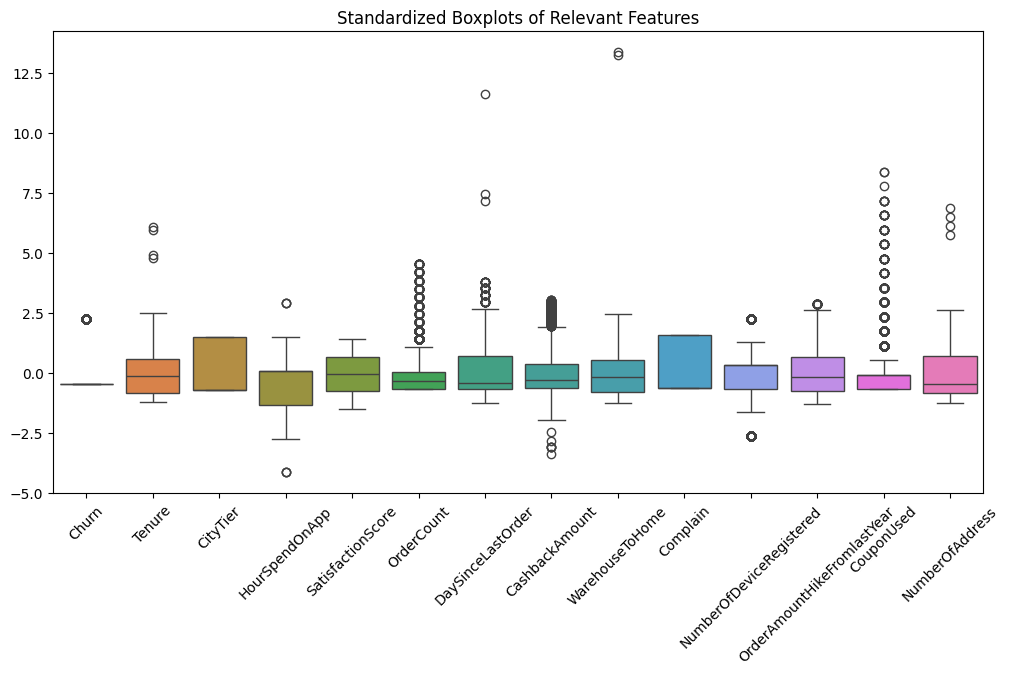

In [46]:
# 12. (b) Plot the boxplots for standardized features
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_scaled)
plt.xticks(rotation=45)
plt.title("Standardized Boxplots of Relevant Features")
plt.show()

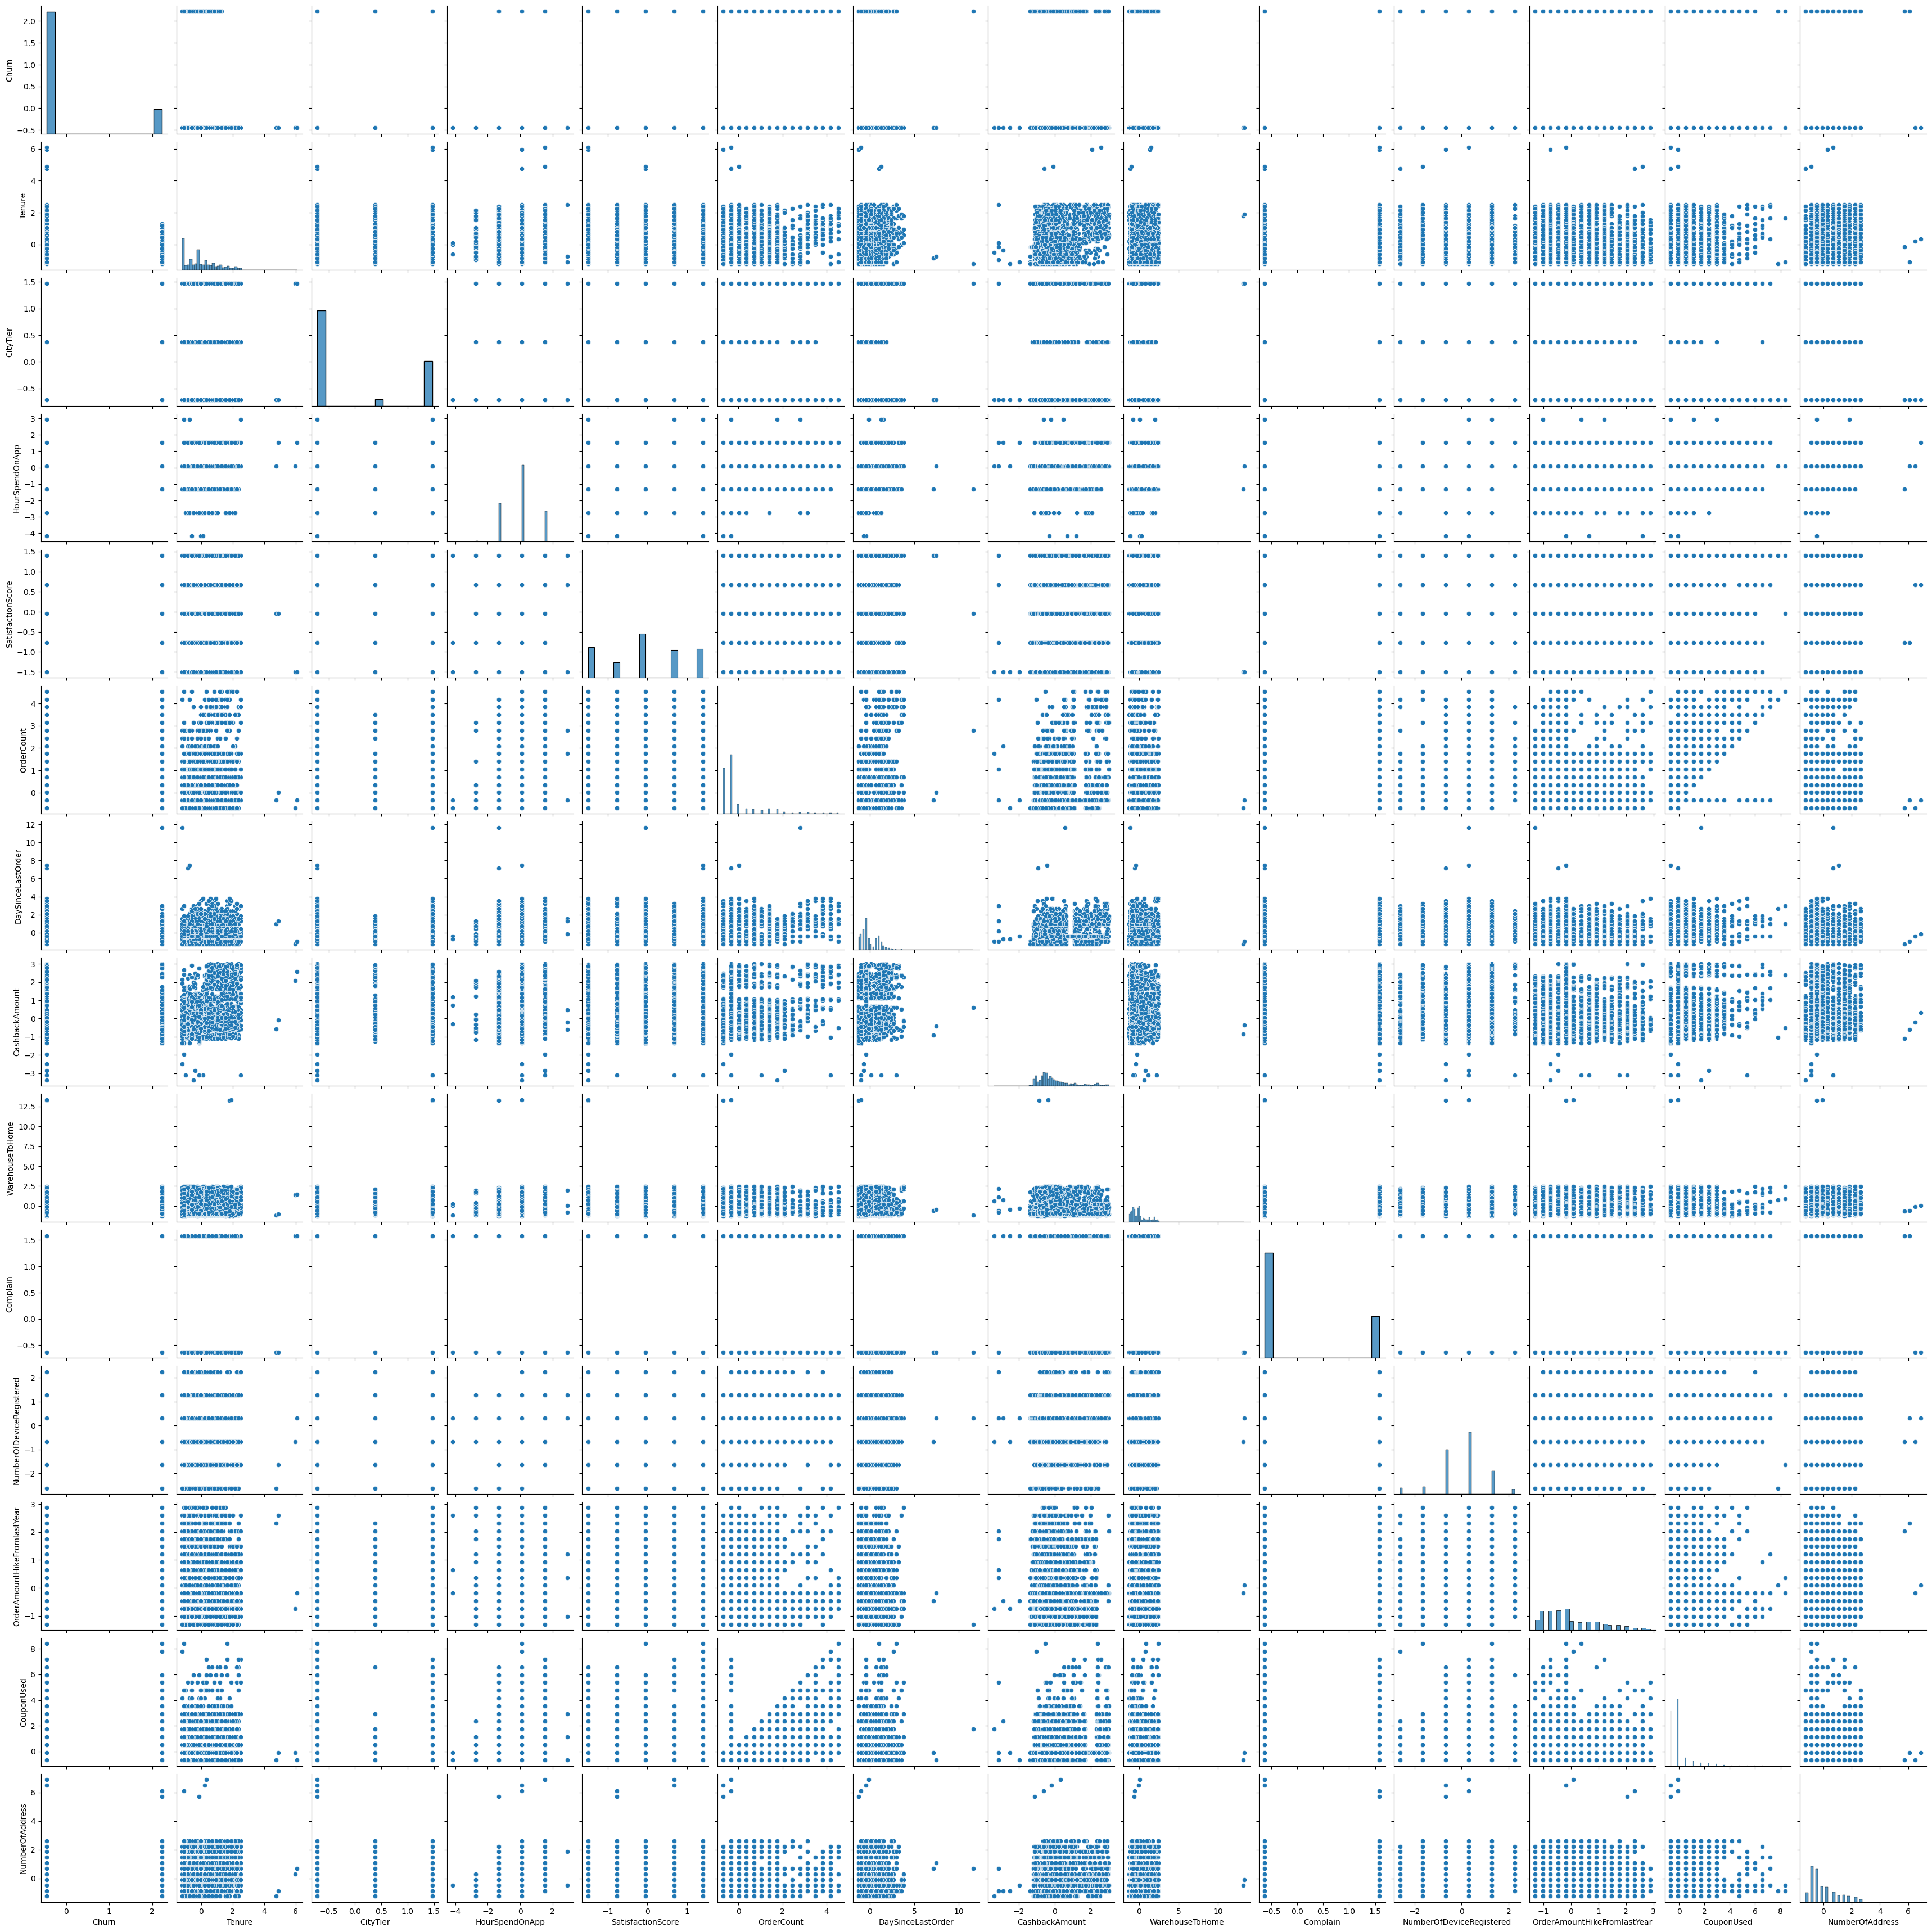

In [47]:
# 13. (c) Draw pairplots for the standardized features
sns.pairplot(df_scaled)
plt.show()

### Findings: Columns for Regression, Classification, and Clustering

**Regression:**
We can predict the following column values using regression:

| Column                      | Description                              |
|-----------------------------|------------------------------------------|
| WarehouseToHome             | Distance (e.g., kilometers/miles)        |
| HourSpendOnApp              | Time spent (e.g., hours)                 |
| OrderAmountHikeFromlastYear | Percentage increase (e.g., 15.5%)        |
| CashbackAmount              | Monetary value (e.g., $25.30)            |
| Tenure                      | Duration (e.g., 6.5 months)              |
| DaySinceLastOrder           | Continuous measure (e.g., 30.5 days)     |

**Classification:**
We can perform classification on the below columns:

| Column                     | Description                                       |
|----------------------------|---------------------------------------------------|
| Churn (target variable)    | Predict if a user churns or not                   |
| PreferredLoginDevice       | Preferred login device of customer                |
| PreferredPaymentMode       | Preferred payment method of customer              |
| PreferedOrderCat           | Preferred order category of customer in last month|
| MaritalStatus              | Marital status of customer                        |
| SatisfactionScore          | Satisfactory score of customer on service         |
| NumberOfDeviceRegistered   | Number of devices (e.g., 2 devices)               |
| NumberOfAddress            | Number of addresses (e.g., 3 addresses)           |
| CouponUsed                 | Number of coupons used (e.g., 5 coupons)          |
| OrderCount                 | Number of orders (e.g., 10 orders)                |
| Complain                   | 0 (No) / 1 (Yes)                                  |

**Clustering:**
Group using features: All continuous + encoded categorical/discrete columns

Group customers based on Tenure, CityTier, and CashbackAmount.

## Key Learnings and Difficulties

##### What Did We Learn from These Steps?

This assignment emphasized the importance of thorough data cleaning and understanding data distributions.
- Handling missing values required careful consideration of appropriate imputation methods.
- Visualizations revealed challenges in interpreting boxplots with limited data points.
- Difficulties included determining appropriate features for zero replacement and managing overlapping visualizations.
- The exercise highlighted that EDA is a repetitive process and showed how important it is to understand the subject area when cleaning and preparing data.


The columns showing the highest correlation with the target variable (Churn) are:
- Tenure
- OrderCount
- HourSpendOnApp

These columns can be used to build predictive models for customer churn. High correlation indicates that changes in these features are strongly associated with changes in the target variable. For instance, Tenure can help identify long-term customers who are less likely to churn, while Orderount and HourSpendOnApp can provide insights into customer engagement and purchasing behavior.


In [48]:
# 14. (d) Calculate Pearson's correlation with 'Churn'
correlations = {}
for col in df.select_dtypes(include=['number']).columns:
    if col != "Churn":
        corr, _ = pearsonr(df[col], df["Churn"])
        correlations[col] = corr
        print(f"Pearson correlation between {col} and Churn: {corr:.3f}")

Pearson correlation between Tenure and Churn: -0.338
Pearson correlation between CityTier and Churn: 0.085
Pearson correlation between WarehouseToHome and Churn: 0.070
Pearson correlation between HourSpendOnApp and Churn: 0.019
Pearson correlation between NumberOfDeviceRegistered and Churn: 0.108
Pearson correlation between SatisfactionScore and Churn: 0.105
Pearson correlation between NumberOfAddress and Churn: 0.044
Pearson correlation between Complain and Churn: 0.250
Pearson correlation between OrderAmountHikeFromlastYear and Churn: -0.007
Pearson correlation between CouponUsed and Churn: -0.004
Pearson correlation between OrderCount and Churn: -0.024
Pearson correlation between DaySinceLastOrder and Churn: -0.156
Pearson correlation between CashbackAmount and Churn: -0.156



Feature: Tenure
  R² score on test data: 0.096
  Pearson correlation: -0.338  ->  Pearson^2: 0.114


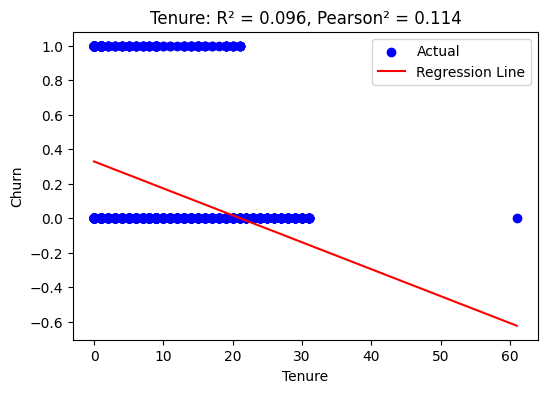


Feature: CityTier
  R² score on test data: 0.002
  Pearson correlation: 0.085  ->  Pearson^2: 0.007


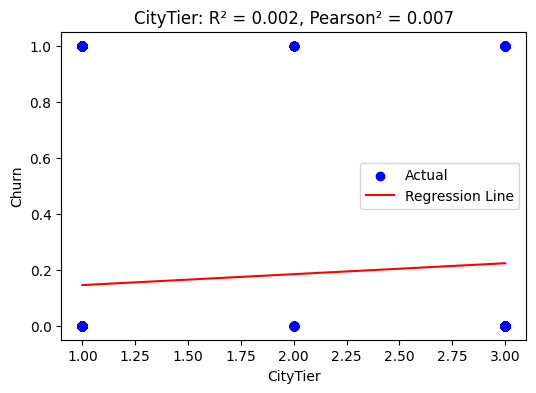


Feature: WarehouseToHome
  R² score on test data: 0.002
  Pearson correlation: 0.070  ->  Pearson^2: 0.005


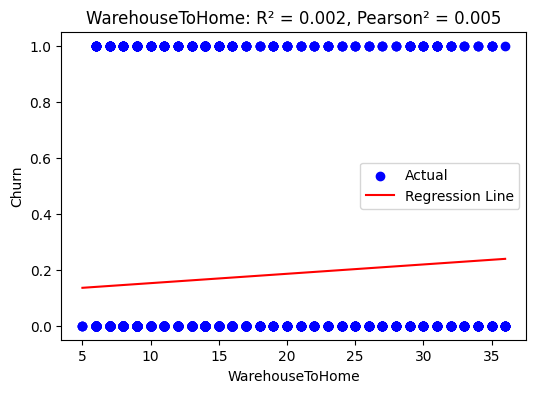


Feature: HourSpendOnApp
  R² score on test data: 0.000
  Pearson correlation: 0.019  ->  Pearson^2: 0.000


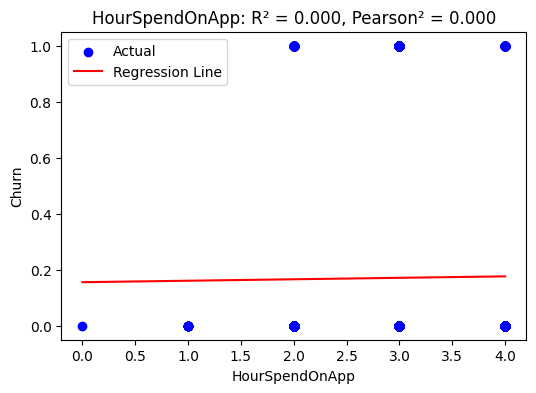


Feature: NumberOfDeviceRegistered
  R² score on test data: 0.016
  Pearson correlation: 0.108  ->  Pearson^2: 0.012


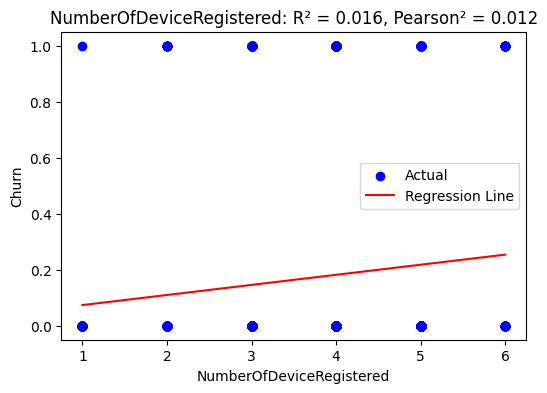


Feature: SatisfactionScore
  R² score on test data: 0.013
  Pearson correlation: 0.105  ->  Pearson^2: 0.011


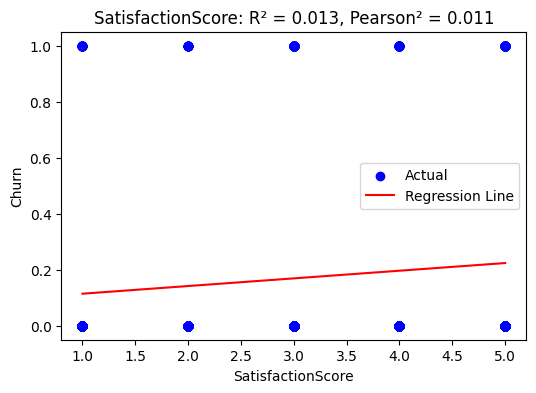


Feature: NumberOfAddress
  R² score on test data: 0.003
  Pearson correlation: 0.044  ->  Pearson^2: 0.002


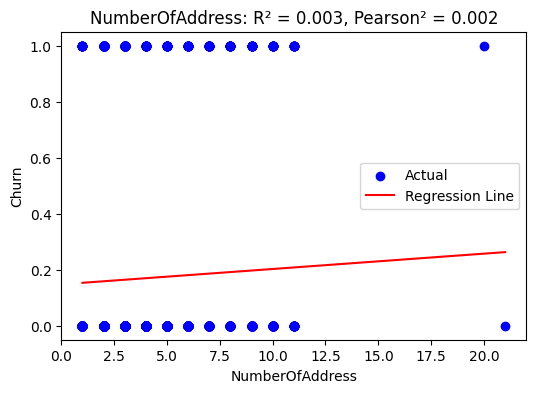


Feature: Complain
  R² score on test data: 0.054
  Pearson correlation: 0.250  ->  Pearson^2: 0.063


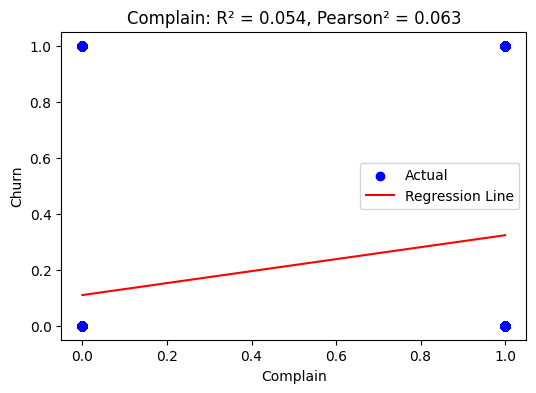


Feature: OrderAmountHikeFromlastYear
  R² score on test data: -0.001
  Pearson correlation: -0.007  ->  Pearson^2: 0.000


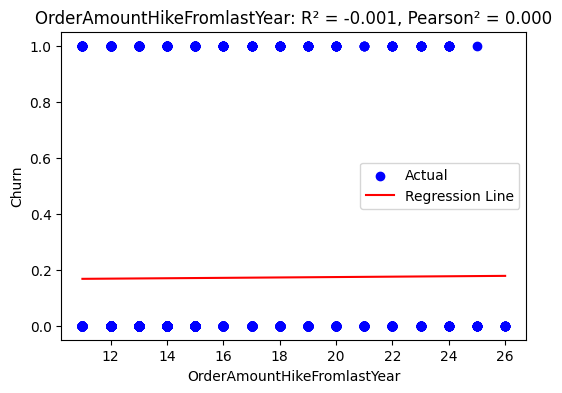


Feature: CouponUsed
  R² score on test data: -0.000
  Pearson correlation: -0.004  ->  Pearson^2: 0.000


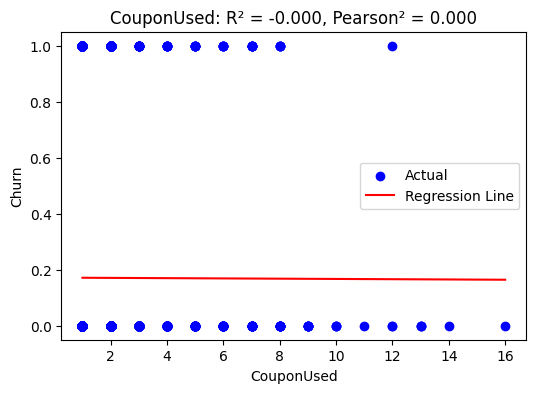


Feature: OrderCount
  R² score on test data: -0.003
  Pearson correlation: -0.024  ->  Pearson^2: 0.001


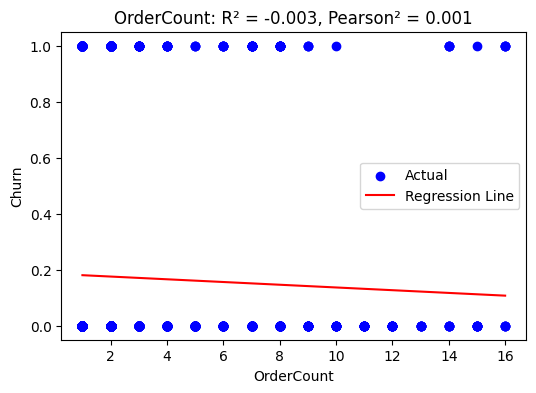


Feature: DaySinceLastOrder
  R² score on test data: 0.020
  Pearson correlation: -0.156  ->  Pearson^2: 0.024


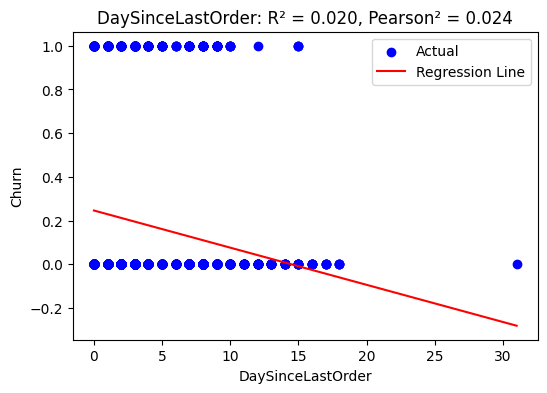


Feature: CashbackAmount
  R² score on test data: 0.012
  Pearson correlation: -0.156  ->  Pearson^2: 0.024


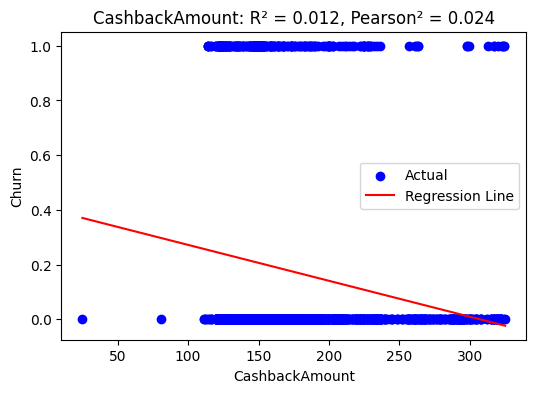

In [49]:
# 15. Perform simple linear regression (univariate) for each numeric feature vs. Churn and measure R² on test data
numeric_features = [col for col in df.select_dtypes(include=['number']).columns if col != 'Churn']

for col in numeric_features:
        X = df[[col]]
        y = df["Churn"]

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        model = LinearRegression()
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)

        r, _ = pearsonr(df[col], df["Churn"])
        pearson_sq = r ** 2

        print(f"\nFeature: {col}")
        print(f"  R² score on test data: {r2:.3f}")
        print(f"  Pearson correlation: {r:.3f}  ->  Pearson^2: {pearson_sq:.3f}")

        plt.figure(figsize=(6, 4))
        plt.scatter(X_test, y_test, color='blue', label='Actual')

        sorted_idx = np.argsort(X_test[col].values.flatten())
        plt.plot(X_test[col].values.flatten()[sorted_idx],
                y_pred[sorted_idx],
                color='red',
                label='Regression Line')
        
        plt.title(f"{col}: R² = {r2:.3f}, Pearson² = {pearson_sq:.3f}")
        plt.xlabel(col)
        plt.ylabel("Churn")
        plt.legend()
        plt.show()